In [6]:
# Usual import
import numpy as np
import matplotlib.pyplot as plt

# Load a test image
im = plt.imread('Downloads/image_test.jpg')

In [8]:
print(type(im), im.shape, im.dtype)

<class 'numpy.ndarray'> (3008, 4008, 3) uint8


In [9]:
im[0, 0, :]

array([18, 18,  8], dtype=uint8)

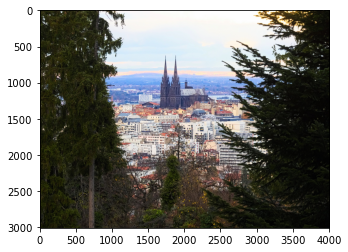

In [11]:
plt.imshow(im, interpolation=None);

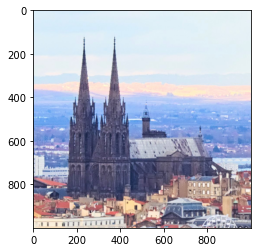

In [13]:
plt.imshow(im[500:1500, 1500:2500,], interpolation=None);

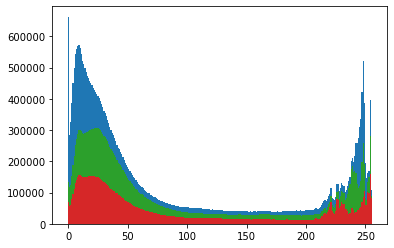

In [30]:
r, g, b = im[:, :, 0].flatten(), im[:, :, 1].flatten(), im[:, :, 2].flatten()
plt.hist([r, g, b], bins=np.linspace(-0.5, 255.5, 257), 
         stacked=True, color=['tab:red', 'tab:green', 'tab:blue']);

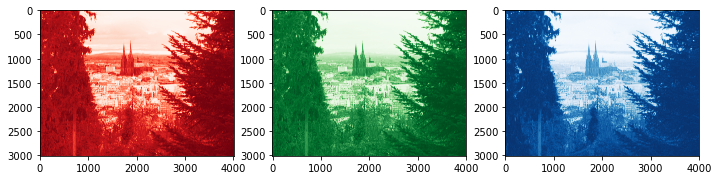

In [34]:
# Get each color channel
R, G, B = im[...,0], im[...,1], im[...,2]
   
# Figure shape preserving the image ratio
ly, lx = im.shape[:2]
w = (ly/lx)*3
fig = plt.figure(figsize=(w*3.5*1.5,5*1.5))
    
# One subplot per channel (Nrow, Ncol, Nplot)
for i, (pixel, color) in enumerate(zip([R, G, B], ['Reds_r', 'Greens_r', 'Blues_r'])):
    plt.subplot(1, 3, i+1)
    plt.imshow(pixel, interpolation=None, cmap=color)

In [48]:
# Get RGB individual values
R, G, B = im[...,0], im[...,1], im[...,2]

# Get gray scale from RGB colors: PIX = 0.299 R + 0.587 G + 0.114 B
pixels = np.array(0.299*R + 0.587*G + 0.114*B, dtype=np.uint8)
pixels2 = (0.299*R + 0.587*G + 0.114*B) / 255.
BWim = np.stack([pixels]*3, axis=2)
BWim2 = np.stack([pixels2]*3, axis=2)
print(BWim.shape, np.count_nonzero(BWim>255))

(3008, 4008, 3) 0


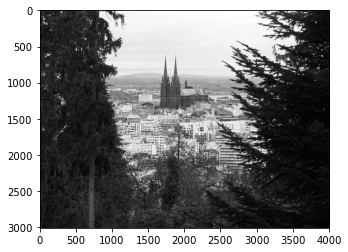

In [47]:
plt.imshow(BWim);

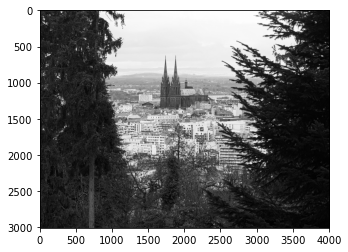

In [49]:
plt.imshow(BWim2);

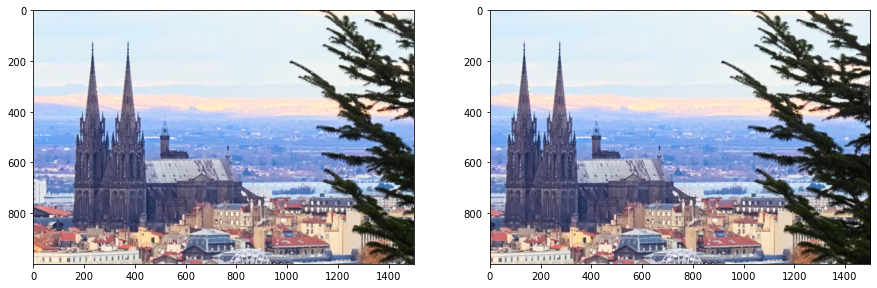

In [50]:
# Create the two images
image1 = im[500:1500, 1500:3000]
image2 = im[500:1500, 1600:3100]

# Plot the two images side-by-side
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.subplot(1, 2, 2)
plt.imshow(image2);

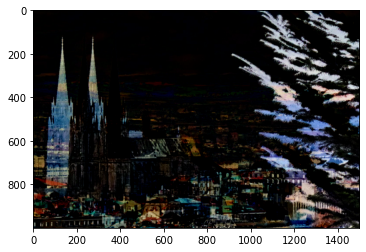

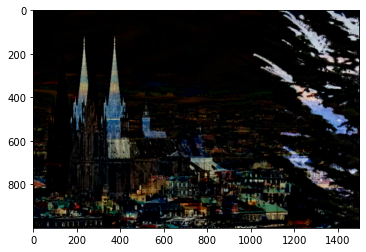

In [71]:
def convertPicture(image):
    image[image<0] = 0
    image[image>255] = 255
    return np.array(image, dtype=np.uint8)

def sumPicture(im1, im2):
    return convertPicture(im1.astype(np.float32)+im2.astype(np.float32))

def subPicture(im1, im2):
    return convertPicture(im1.astype(np.float32)-im2.astype(np.float32))


plt.figure()
plt.imshow(subPicture(image1, image2))
plt.figure()
plt.imshow(subPicture(image2, image1))

In [84]:
# Get the copy of colors (to be modifed latter) 
r, g, b = im[...,0].copy(), im[..., 1].copy(), im[..., 2].copy()

Number of to-be-modified pixels: 0


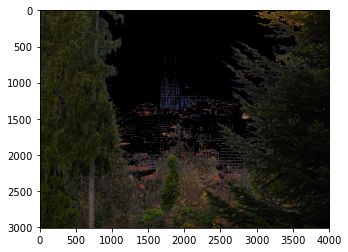

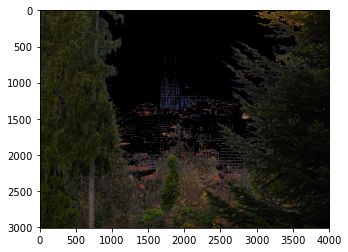

In [87]:
# set all pixels with blue>100 to black and plot the image

#  1. create a mask
mask = b>100
print(f'Number of to-be-modified pixels: {np.count_nonzero(mask)}')

#  2. apply the mask and modify the pixel values
r[mask], g[mask], b[mask] = 0, 0, 0

#  3. group the modified colors in one image (array)
newImage = np.stack([r, g, b], axis=2)

#  4. plot the obtained image
plt.imshow(newImage);

# OPTION 2
newImage2 = im.copy()
mask2 = newImage2[..., 2]>100
newImage2[mask2] = 0
plt.figure()
plt.imshow(newImage2)

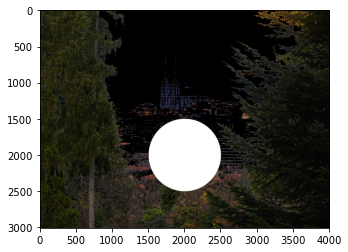

In [95]:
def idx_in_circle(im, x0, y0, R):
    ly, lx = im.shape[:2]
    Xs, Ys = np.arange(0, lx), np.arange(0, ly)
    XX, YY = np.meshgrid(Xs, Ys)
    radius = ((XX-x0)**2 + (YY-y0)**2)**0.5
    return radius<=R

mask = idx_in_circle(newImage2, 2000, 2000, 500)

newImage2[mask] = 255
plt.imshow(newImage2);